# 📌 Problem Statement

Pokemon is a role-playing game originated from Japan. The player builds a team of six monsters to battle other pokemon trainers with the goal of being the best. There are different types of pokemon, think of a complex version of rock-paper-scissors. This game relies heavily on statistics to portray the abilities and power levels of pokemon. 

This project aims to conduct an exploratory data analysis (EDA) on a comprehensive Pokémon dataset to uncover meaningful patterns across stats, types, and generations. The goal is to provide both players and analysts with a visual, data-driven overview of how Pokémon attributes vary, which types perform best, and how the game has evolved across generations. This information can be used to enhance gameplay strategy or demonstrate practical data analysis skills.

# ✅Objectives

**This project will utilize an exploratory data analysis to uncover the following:**
1. Identifying top-performing Pokémon types by analyzing total base stats and individual stat categories (e.g., Attack, Speed, HP).
2. Visualizing Pokémon population growth over time by showing how many new Pokémon were introduced in each generation.
3. Analyzing the frequency and distribution of dual-type Pokémon, including trends across generations and common type pairings.
4. Comparing Pokémon statuses (normal, sub-legendary, legendary, mythical) to understand how they differ in stats and other attributes.
5. Uncovering stat distribution trends across generations to identify shifts in design emphasis (e.g., more speed-focused Pokémon). (I'm not sure how to do this)
6. Investigating the relationship between Pokémon strength and catch rate — are stronger Pokémon harder to catch?
7. Generating a type-based performance overview by calculating average stats grouped by primary and secondary type. (I'm not sure how to do this)
8. Analyzing Pokémon growth rates per type to observe any trends in development pace. (I'm not sure how to do this)
9. Top 10 strongest pokemon based on stats
10. Top pokemon based on each specific stat

# 🔢Steps to be Followed
1. File set-up 
2. Data cleaning (Excel)
3. Data Wrangling (Excel and SQL)
4. Visualizing the Data (Python)
5. Dashboarding the data to deliver insights (Tableau)
6. Interpretations and recommendations

# 🔍Step 1: File Set-up🔍
Created a main project folder named Pokemon_EDA_Project to organize all the assets. 
Created four subfolders: /data, /analysis, /dashboard, and /documentation. These were set up to keep different parts of the workflow clearly separated and easy to manage. Once the structure was in place, I downloaded the raw CSV dataset from Kaggle and saved it in the /data folder for easy reference and backup before cleaning or transformation began.





# Step 2:🧹Data Cleaning🧹
I opened up the raw CSV file and inspected the data set. I noticed that there a few columns that wouldn't be useful with the analysis I want to conduct. Some columns were not relevant to the analysis objectives namely; 
1. german_name
2. japanese_name
3. abilities_number
4. ability1
5. ability2
6. ability_hidden
7. species
8. egg_type
9. egg_type1
10. egg_type2
11. all of the against columns (18 in number)
12. egg_cycles
13. base_friendships

Wowza, I took away 30 columns from the dataset. The initial dataset had 51 unique columns and the cleaned dataset now has 21 columns left. Now the data set has the structure I would like for the analysis. It's time to format some data. To ensure consistency I did the following:

1. 0 is used to represent unknown or genderless (e.g., percentage_male = 0).
2. -1 is used when no data exists yet (e.g., base experience not available).
3. "none" is used in text columns (e.g., type_2) when a Pokémon doesn’t have a secondary type, instead of leaving it blank.


# Step 3: Data Wrangling and Database Setup in SQL

For the following section we will be setting up the database in SQL before we wrangle our data. The following are the queries used.

## Database Initialization
```sql
CREATE DATABASE pokemon_eda;
USE pokemon_eda;
```

## Table Creation
```
CREATE TABLE pokemon (
  id INT,
  pokedex_number INT,
  name VARCHAR(100),
  generation INT,
  status_cleaned VARCHAR(50),
  type_number INT,
  type_1 VARCHAR(30),
  type_2 VARCHAR(30),
  height_m FLOAT,
  weight_kg FLOAT,
  total_points INT,
  hp INT,
  attack INT,
  defense INT,
  sp_attack INT,
  sp_defense INT,
  speed INT,
  catch_rate INT,
  base_experience INT,
  growth_rate VARCHAR(50),
  percentage_male FLOAT
);
```
After this we upload our csv file into the database. We can now start querying based on our objectives.

## Objective 1
1. Average Stats by Primary Type. I grouped the data by type_1 to learn which primary types are the strongest
```
SELECT 
  type_1,
  COUNT(*) AS number_of_pokemon,
  ROUND(AVG(total_points), 2) AS avg_total_points,
  ROUND(AVG(hp), 2) AS avg_hp,
  ROUND(AVG(attack), 2) AS avg_attack,
  ROUND(AVG(defense), 2) AS avg_defense,
  ROUND(AVG(sp_attack), 2) AS avg_sp_attack,
  ROUND(AVG(sp_defense), 2) AS avg_sp_defense,
  ROUND(AVG(speed), 2) AS avg_speed
FROM pokemon
GROUP BY type_1
ORDER BY avg_total_points DESC
```
2. Single vs. Dual-Type Strength by Generation
The purpose of this was to find out if dual-type pokemons are stronger than single-type pokemons, I grouped the data by generation and type_number. This helps find out if there are trends to compare across generations.
```
SELECT 
  generation,
  type_number,
  COUNT(*) AS number_of_pokemon,
  ROUND(AVG(total_points), 2) AS avg_total_points,
  ROUND(AVG(hp), 2) AS avg_hp,
  ROUND(AVG(attack), 2) AS avg_attack,
  ROUND(AVG(defense), 2) AS avg_defense,
  ROUND(AVG(sp_attack), 2) AS avg_sp_attack,
  ROUND(AVG(sp_defense), 2) AS avg_sp_defense,
  ROUND(AVG(speed), 2) AS avg_speed
FROM pokemon
GROUP BY generation, type_number
ORDER BY avg_total_points DESC;
```
3. Strongest Type Combinations
This query was ran to find out which combinations of types are the strongest. Take note that the query ran utilized the case and when functions to properly show type combos. Since a bug/water and water/bug type combo should be the same, we solved it by choosing the lexicographically smallest letter to be the first type and vice versa.
```
SELECT 
  CASE
    WHEN type_2 = 'none' THEN type_1
    WHEN type_1 < type_2 THEN CONCAT(type_1, '/', type_2)
    ELSE CONCAT(type_2, '/', type_1)
  END AS type_combo,
  COUNT(*) AS number_of_pokemon,
  ROUND(AVG(total_points), 2) AS avg_total_points,
  ROUND(AVG(hp), 2) AS avg_hp,
  ROUND(AVG(attack), 2) AS avg_attack,
  ROUND(AVG(defense), 2) AS avg_defense,
  ROUND(AVG(sp_attack), 2) AS avg_sp_attack,
  ROUND(AVG(sp_defense), 2) AS avg_sp_defense,
  ROUND(AVG(speed), 2) AS avg_speed
FROM pokemon
GROUP BY type_combo
ORDER BY avg_total_points DESC;
```

## Objective 2
This is a simple query to find out the number of pokemon added per generation.
```
SELECT 
  generation,
  COUNT(*) AS number_of_pokemon
FROM pokemon_eda.pokemon
GROUP BY generation
ORDER BY generation;
```

## Objective 3
1. Count of Single-Type vs Dual-Type Pokémon per Generation
```
SELECT 
  generation,
  type_number,
  COUNT(*) AS number_of_pokemon
FROM pokemon
GROUP BY generation, type_number
ORDER BY generation, type_number;
```
2. Top 10 Most Common Dual-Type Combinations
```
SELECT 
  CASE
    WHEN type_1 < type_2 THEN CONCAT(type_1, '/', type_2)
    ELSE CONCAT(type_2, '/', type_1)
  END AS type_combo,
  COUNT(*) AS number_of_pokemon
FROM pokemon
WHERE type_2 != 'none'
GROUP BY type_combo
ORDER BY number_of_pokemon DESC LIMIT 11;
```
(Note there was a 4 way tie, that's why it's 11 pokemon instead of 10)

3. Pairing Trends of Dual-Types (Heatmap)
```
SELECT 
  LEAST(type_1, type_2) AS type_x,
  GREATEST(type_1, type_2) AS type_y,
  COUNT(*) AS number_of_pokemon
FROM pokemon
WHERE type_2 != 'none'
GROUP BY type_x, type_y
ORDER BY number_of_pokemon DESC;
```
## Objective 4
1. Stat Differences Across Statuses
Here we try to find out if there is a difference in stats per pokemon status. This set will include: normal, mythical, sub-legendary, and legendary pokemon.
```
#Stat differences across pokemon statuses
SELECT 
  status_cleaned, 
  COUNT(*) AS number_of_pokemon,
  ROUND(AVG(total_points), 2) AS avg_total_points,
  ROUND(AVG(hp), 2) AS avg_hp,
  ROUND(AVG(attack), 2) AS avg_attack,
  ROUND(AVG(defense), 2) AS avg_defense,
  ROUND(AVG(sp_attack), 2) AS avg_sp_attack,
  ROUND(AVG(sp_defense), 2) AS avg_sp_defense,
  ROUND(AVG(speed), 2) AS avg_speed
FROM pokemon_eda.pokemon
GROUP BY status_cleaned
ORDER BY avg_total_points DESC;
```
## Objective 5
1. Stat Differences Across Generations
```
SELECT 
  status_cleaned, 
  COUNT(*) AS number_of_pokemon,
  ROUND(AVG(total_points), 2) AS avg_total_points,
  ROUND(AVG(hp), 2) AS avg_hp,
  ROUND(AVG(attack), 2) AS avg_attack,
  ROUND(AVG(defense), 2) AS avg_defense,
  ROUND(AVG(sp_attack), 2) AS avg_sp_attack,
  ROUND(AVG(sp_defense), 2) AS avg_sp_defense,
  ROUND(AVG(speed), 2) AS avg_speed
FROM pokemon_eda.pokemon
GROUP BY status_cleaned
ORDER BY avg_total_points DESC;
```
## Objective 6
1. Relationship of Catch Rate and Pokemon Strength(Total Stat Points)
```
SELECT
ROUND(total_points, -1) AS stat_range,
COUNT(*) AS num_of_pokemon,
ROUND(AVG(catch_rate), 2) AS avg_catch_rate
FROM pokemon_eda.pokemon
WHERE catch_rate != -1
GROUP BY ROUND(total_points, -1)
ORDER BY stat_range;
```
## Objective 7
1. Summary Table of Type Combos
I reused the query in objective 1, query 3 since it fulfills both objectives. This query groups Pokémon by their type combinations (normalized using lexicographical ordering) and calculates the average stats per combination. It supports dashboard features where users can compare performance metrics across different type pairings.

## Objective 8
1. Growth Rate per Primary Type
This query was used to examine the distribution of growth rates across primary Pokémon types. The goal is to identify which types are more commonly associated with faster or slower experience growth curves. By grouping Pokémon by their type_1 and corresponding growth_rate, we can uncover patterns such as: Which types tend to level up faster
* (e.g., commonly paired with "Fast" or "Medium Fast" growth)
* Which types are slower to train and develop (e.g., "Slow", "Fluctuating", or "Erratic")
This insight can help inform design trends or balance choices in the Pokémon franchise.
```
SELECT 
  type_1,
  growth_rate,
  COUNT(*) AS number_of_pokemon
FROM pokemon_eda.pokemon
GROUP BY type_1, growth_rate
ORDER BY type_1, number_of_pokemon DESC;
```
## Objective 9
1. Top 10 Strongest Pokemon by Total Stats
```
SELECT 
  pokemon_name,
  total_points
FROM pokemon_eda.pokemon
ORDER BY total_points DESC
LIMIT 10;
```
## Objective 10
1. Top Pokemon for Each Stat
I utilized a combination of CTE's, Window functions (Dense Rank), and Partition by to evaluate these in multiple columns.
```
#Long format combination of all stats
WITH all_stats AS (
  SELECT 'HP' AS stat, pokemon_name, hp AS value FROM pokemon_eda.pokemon
  UNION ALL
  SELECT 'Attack', pokemon_name, attack FROM pokemon_eda.pokemon
  UNION ALL
  SELECT 'Defense', pokemon_name, defense FROM pokemon_eda.pokemon
  UNION ALL
  SELECT 'Sp. Attack', pokemon_name, sp_attack FROM pokemon_eda.pokemon
  UNION ALL
  SELECT 'Sp. Defense', pokemon_name, sp_defense FROM pokemon_eda.pokemon
  UNION ALL
  SELECT 'Speed', pokemon_name, speed FROM pokemon_eda.pokemon
),
#Dense Rank to read the ties properly
ranked AS (
  SELECT *, DENSE_RANK() OVER (PARTITION BY stat ORDER BY value DESC) AS rnk
  FROM all_stats
)
#Main Query
SELECT stat, pokemon_name, value
FROM ranked
WHERE rnk = 1;
```

## Step 4: 👀Visualizing The Data👀
### Some images created here will serve as my personal practice and might not be in the final dashboard
1. Creating the environment
2. Loading the data
3. Visualizing the data
4. Saving the visualization in a PNG file for tableau dashboarding.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


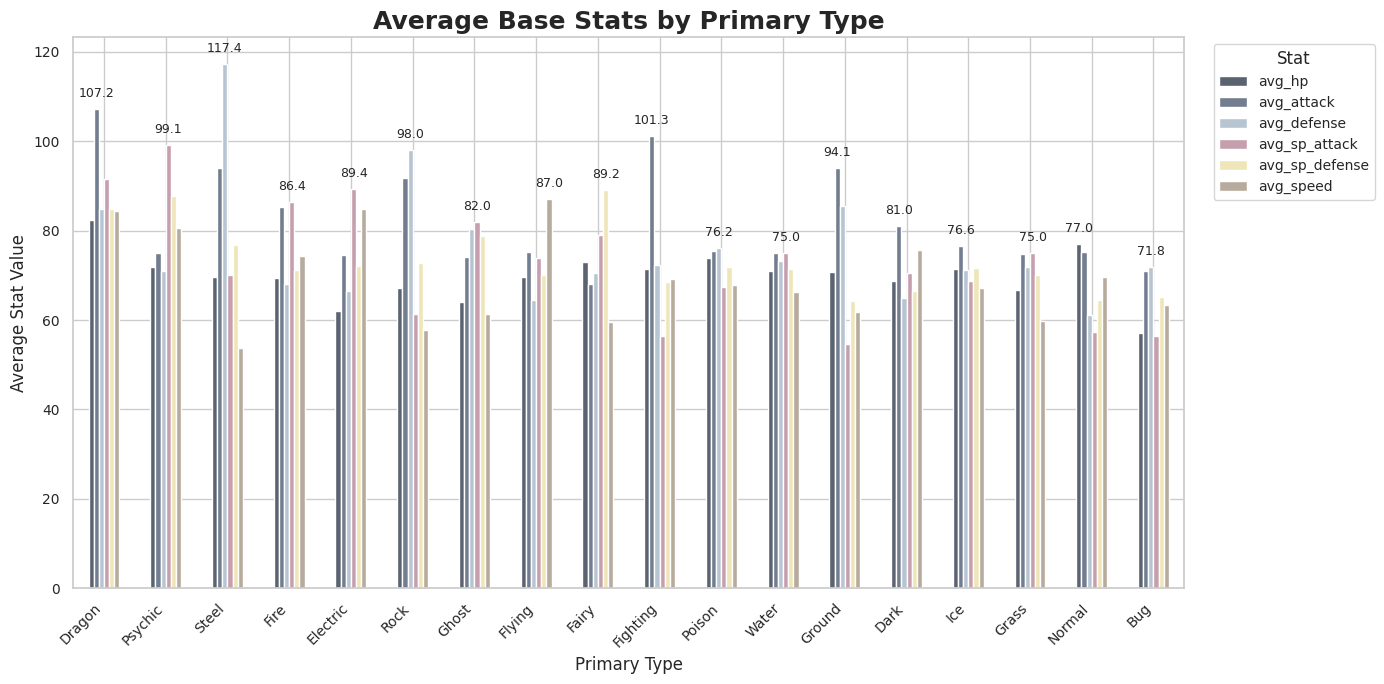

In [2]:


# Set a visual style for plots
sns.set(style='whitegrid')

# Load one of your CSVs (adjust the file path accordingly)
df = pd.read_csv('/kaggle/input/queried-csvs/objective 1.1.csv')

# Objective 1.1: Compare average stats per primary type

# Choose stat columns
stat_columns = ['avg_hp', 'avg_attack', 'avg_defense', 'avg_sp_attack', 'avg_sp_defense', 'avg_speed']

# Set index to type_1 for clearer x-axis
df.set_index('type_1', inplace=True)

# Set Color Palette
pokemon_palette = ['#5B6370', '#727D90', '#B7C5D2', '#C59FAE', '#EEE6B8', '#B7AB9D'] 

# Plot the grouped bar chart

ax = df[stat_columns].plot(kind='bar',
                          figsize=(14, 7),
                          color=pokemon_palette,
                          )

plt.title('Average Base Stats by Primary Type', fontsize=18, fontweight='bold', fontname='DejaVu Sans')
plt.ylabel('Average Stat Value', fontsize=12, fontname='DejaVu Sans')
plt.xlabel('Primary Type', fontsize=12, fontname='DejaVu Sans')
plt.xticks(rotation=45, ha='right', fontsize=10, fontname='DejaVu Sans')
plt.yticks(fontsize=10, fontname='DejaVu Sans')

# Annotate only the tallest stat bar for each primary type
num_types = len(df)
num_stats = len(stat_columns)

for i in range(num_types):
    heights = [ax.containers[j][i].get_height() for j in range(num_stats)]
    max_stat_idx = heights.index(max(heights))
    bar = ax.containers[max_stat_idx][i]
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 2,
            f'{bar.get_height():.1f}',
            ha='center', va='bottom',
            fontsize=9, fontname='DejaVu Sans')

plt.legend(title='Stat', bbox_to_anchor=(1.02, 1), loc='upper left', prop={'family': 'DejaVu Sans', 'size': 10})
plt.tight_layout()
plt.savefig('avg_stats_by_type.png', dpi=300)
plt.show()

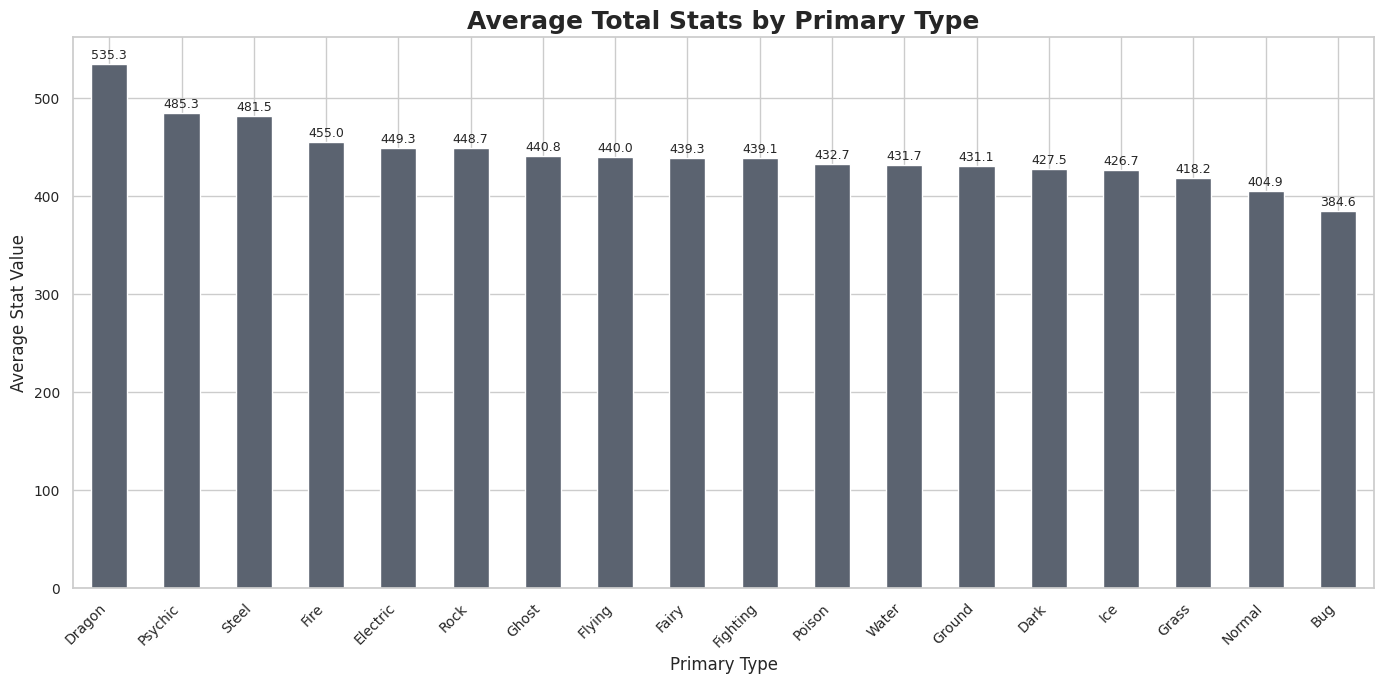

In [3]:
# Objective 1.1: Compare average total stats per primary type
df = pd.read_csv('/kaggle/input/queried-csvs/objective 1.1.csv')

stat_columns = ['avg_total_points']
df.set_index('type_1', inplace=True)

# Color
sns.set(style='whitegrid')
pokemon_color = '#5B6370'



# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(14, 7))
df[stat_columns].plot(kind='bar',
                      ax=ax,
                      color=pokemon_color,
                      legend=False)

plt.title('Average Total Stats by Primary Type', fontsize=18, fontweight='bold', fontname='DejaVu Sans')
plt.ylabel('Average Stat Value', fontsize=12, fontname='DejaVu Sans')
plt.xlabel('Primary Type', fontsize=12, fontname='DejaVu Sans')
plt.xticks(rotation=45, ha='right', fontsize=10, fontname='DejaVu Sans')
plt.yticks(fontsize=10, fontname='DejaVu Sans')

# Annotate bars with values
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2,
            height + 2,
            f'{height:.1f}',
            ha='center',
            va='bottom',
            fontsize=9,
            fontname='DejaVu Sans')
plt.tight_layout()
plt.savefig('avg_total_stats_by_type', dpi=300)
plt.show()


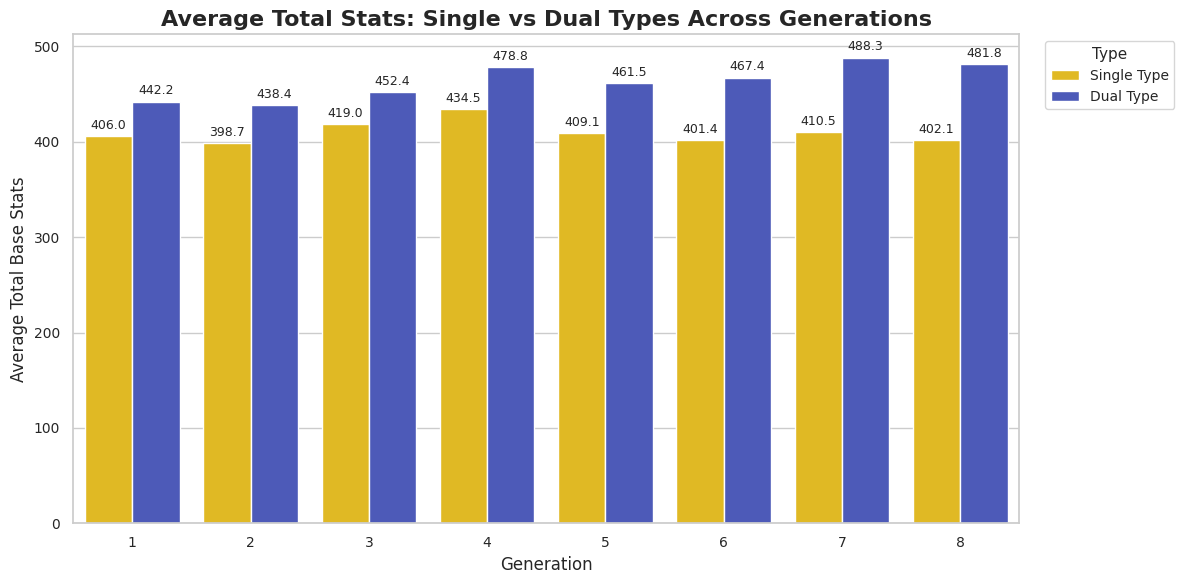

In [4]:
df = pd.read_csv('/kaggle/input/queried-csvs/objective 1.2.csv')



# Set style
sns.set(style='whitegrid')

# Define custom color palette: Yellow (single) and Blue (dual)
pokemon_palette = ['#FFCB05', '#3B4CCA']

# Plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=df,
    x='generation',
    y='avg_total_points',
    hue='type_number',
    palette=pokemon_palette,
)

# Title and axis labels
plt.title('Average Total Stats: Single vs Dual Types Across Generations',
          fontsize=16, fontweight='bold', fontname='DejaVu Sans')
plt.xlabel('Generation', fontsize=12, fontname='DejaVu Sans')
plt.ylabel('Average Total Base Stats', fontsize=12, fontname='DejaVu Sans')
plt.xticks(fontsize=10, fontname='DejaVu Sans')
plt.yticks(fontsize=10, fontname='DejaVu Sans')

handles, labels = barplot.get_legend_handles_labels()
# Legend styling
plt.legend(handles=handles, title='Type', labels=['Single Type', 'Dual Type'],bbox_to_anchor=(1.02, 1),
           loc='upper left', fontsize=10, title_fontsize=11, frameon=True)


for container in barplot.containers:
    barplot.bar_label(container, fmt='%.1f', padding=3, fontsize=9, fontname='DejaVu Sans')

# Finalize and save
plt.tight_layout()
plt.savefig('SingleVsDual_Total_Stats.png', dpi=300)
plt.show()

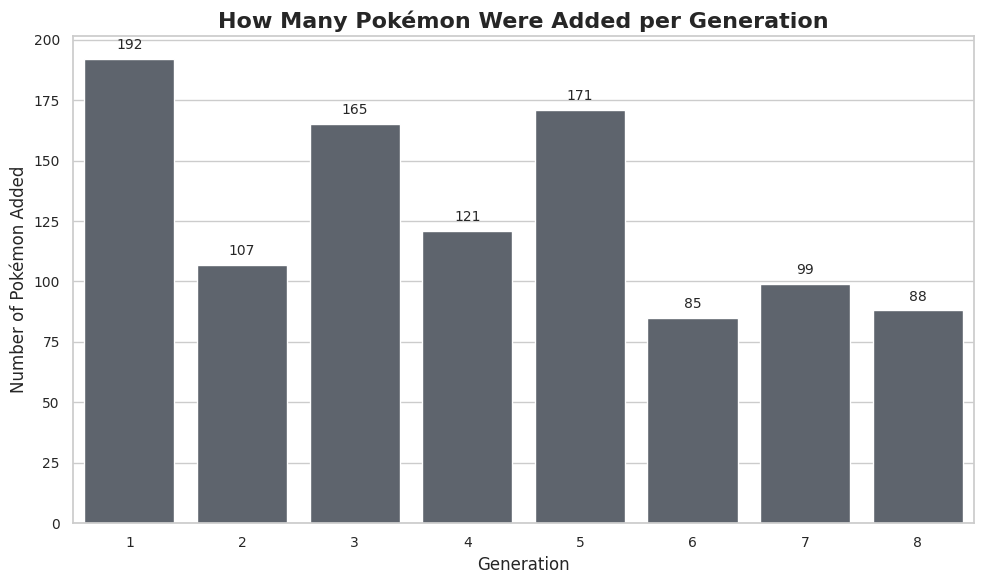

In [5]:
df = pd.read_csv('/kaggle/input/queried-csvs/objective 2.csv')

# Set consistent style
sns.set(style='whitegrid')

# Create figure
plt.figure(figsize=(10, 6))

# Barplot with a themed color (e.g., warm yellow)
barplot = sns.barplot(
    data=df,
    x='generation',
    y='num_pokemon',
    color='#5B6370',
)

# Add labels above each bar
for bar in barplot.patches:
    height = bar.get_height()
    barplot.annotate(f'{int(height)}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 5),  # offset
                     textcoords='offset points',
                     ha='center', va='bottom',
                     fontsize=10, fontname='DejaVu Sans')

# Customize titles and labels
plt.title('How Many Pokémon Were Added per Generation', fontsize=16, fontweight='bold', fontname='DejaVu Sans')
plt.xlabel('Generation', fontsize=12, fontname='DejaVu Sans')
plt.ylabel('Number of Pokémon Added', fontsize=12, fontname='DejaVu Sans')
plt.xticks(fontsize=10, fontname='DejaVu Sans')
plt.yticks(fontsize=10, fontname='DejaVu Sans')

plt.tight_layout()
plt.savefig('pokemon_per_generation.png', dpi=300)
plt.show()

In [6]:
df = pd.read_csv('/kaggle/input/queried-csvs/objective 7.csv')

df.head()

,type_combo,number_of_pokemon,avg_total_points,avg_hp,avg_attack,avg_defense,avg_sp_attack,avg_sp_defense,avg_speed
0,Dragon/Poison,4,712.25,133.25,87.0,127.00,123.5,135.25,106.25
1,Dragon/Ice,3,686.67,125.00,140.0,93.33,140.0,93.33,95.00
2,Dragon/Psychic,5,670.80,83.40,113.4,97.40,141.4,121.40,113.80
3,Ghost/Psychic,3,653.33,104.67,112.0,86.00,148.0,121.33,81.33
4,Dark/Rock,2,650.00,100.00,149.0,130.00,95.0,110.00,66.00


In [7]:

# Define stat columns to normalize
stats = ['avg_hp', 'avg_attack', 'avg_defense', 'avg_sp_attack', 'avg_sp_defense', 'avg_speed']

# Apply MinMaxScaler to ALL rows first
scaler = MinMaxScaler()
scaled_stats = scaler.fit_transform(df[stats])

# Reattach to a new DataFrame with type_combo
normalized_df = pd.DataFrame(scaled_stats, columns=stats)
normalized_df['type_combo'] = df['type_combo'].values
normalized_df['avg_total_points'] = df['avg_total_points'].values  # keep original total points for ranking

# Get the top 5 type combos based on avg_total_points (original, not scaled)
top_5_normalized = normalized_df.sort_values('avg_total_points', ascending=False).head(5)
top_5_normalized = top_5_normalized.set_index('type_combo')

# Final preview
print(top_5_normalized)


                  avg_hp  avg_attack  avg_defense  avg_sp_attack  \
type_combo                                                         
Dragon/Poison   1.000000    0.391667     0.773739       0.812261   
Dragon/Ice      0.937618    0.833333     0.465434       0.938697   
Dragon/Psychic  0.623062    0.611667     0.502701       0.949425   
Ghost/Psychic   0.783894    0.600000     0.398315       1.000000   
Dark/Rock       0.748582    0.908333     0.801209       0.593870   

                avg_sp_defense  avg_speed  avg_total_points  
type_combo                                                   
Dragon/Poison         0.986688   0.726190            712.25  
Dragon/Ice            0.593700   0.619048            686.67  
Dragon/Psychic        0.856848   0.798095            670.80  
Ghost/Psychic         0.856192   0.488857            653.33  
Dark/Rock             0.749977   0.342857            650.00  


* So along this part, I was scratching my head as to what went wrong. It's pretty funny actually, I sorted the data first into the top 5 before normalizing, which lead to the parameters being off.

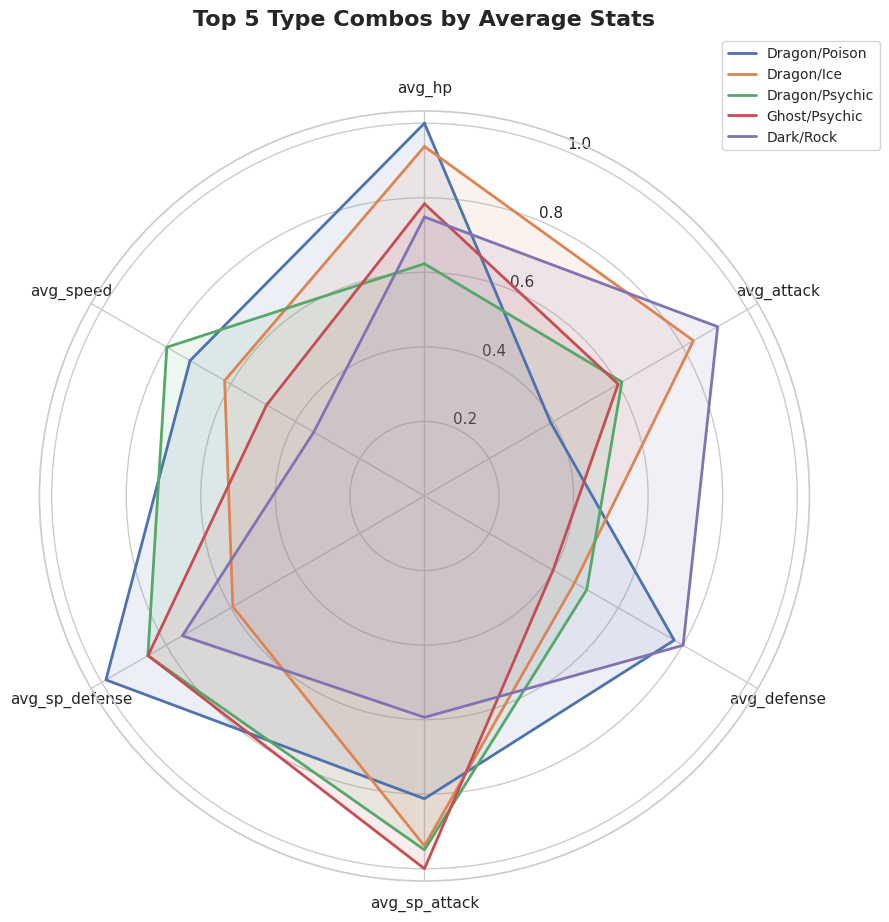

In [8]:

def plot_normalized_radar(df, title):
    labels = df.columns[0:6]  # Exclude avg_total_points
    num_vars = len(labels)

    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # repeat first angle to close the circle

    # Create plot
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    # Plot variables
    for idx, row in df.iterrows():
        values = row[labels].tolist()
        values += values[:1]  # close the loop
        ax.plot(angles, values, label=idx, linewidth=2)
        ax.fill(angles, values, alpha=0.1)

    # Format chart
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels, fontname='DejaVu Sans')

    plt.title(title, size=16, fontweight='bold', fontname='DejaVu Sans', y=1.1)
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1),
              prop={'family': 'DejaVu Sans', 'size': 10})
    plt.savefig('top5_radar', dpi=300)
    plt.show()

# 🔹 Call the function with your DataFrame
plot_normalized_radar(top_5_normalized, "Top 5 Type Combos by Average Stats")


That was refreshing, it took me so long to get this working properly. Since it's my first time using this

In [9]:
type_freq_df = pd.read_csv('/kaggle/input/queried-csvs/objective 3.3.csv')
type_freq_df['number_of_pokemon'] = type_freq_df['number_of_pokemon'].astype(int)
type_freq_df.head()

,type_x,type_y,number_of_pokemon
0,Flying,Normal,27
1,Grass,Poison,15
2,Bug,Flying,14
3,Bug,Poison,13
4,Ghost,Grass,12


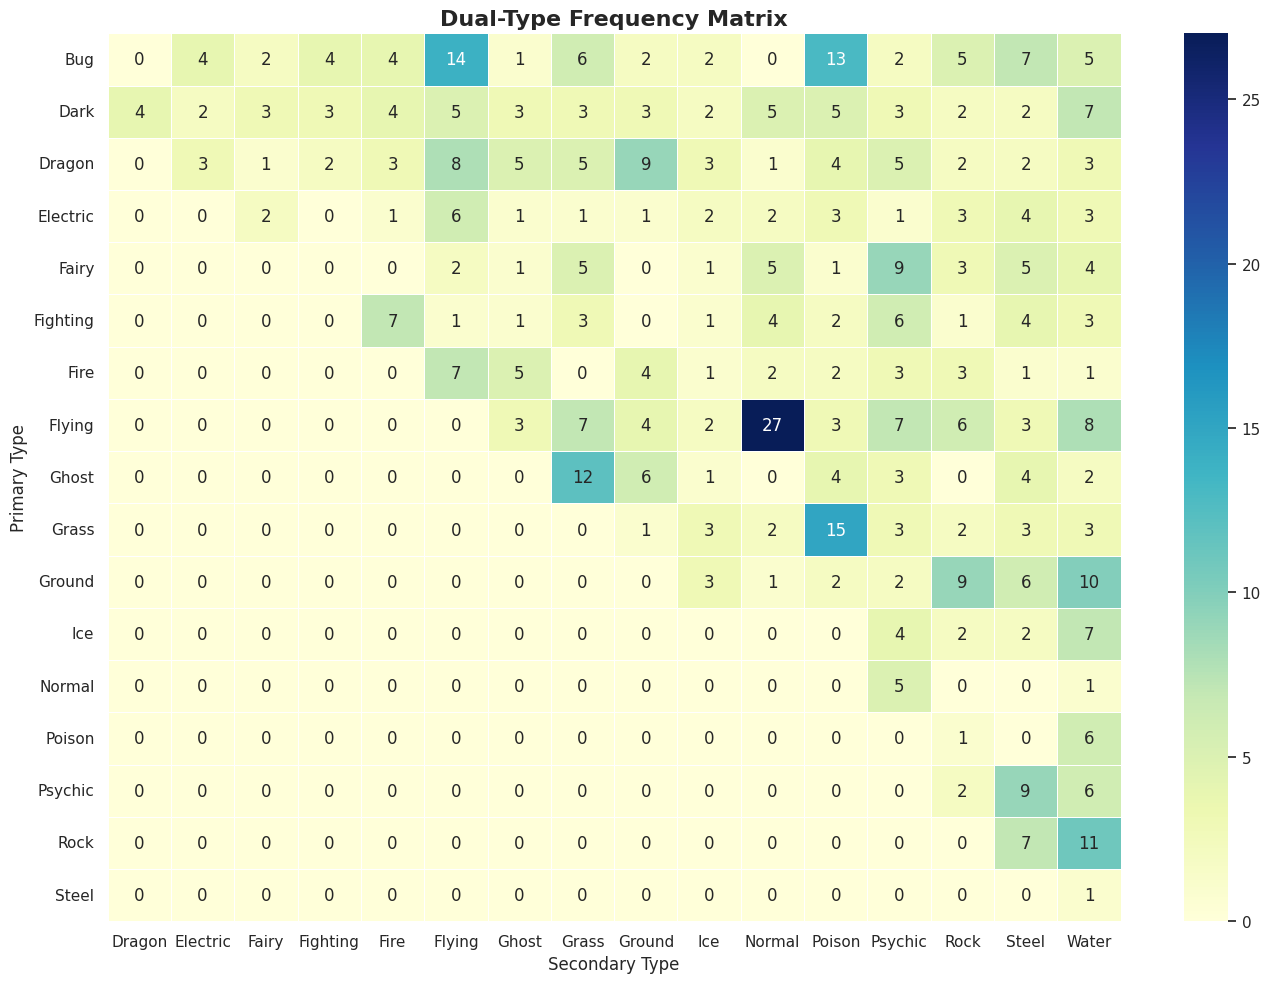

In [10]:
# Pivot the data
heatmap_data = type_freq_df.pivot(index='type_x', columns='type_y', values='number_of_pokemon')

# Fill Nulls with 0, then convert to int
heatmap_data = heatmap_data.fillna(0).astype(int)

# Step 3: Plot
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('Dual-Type Frequency Matrix', fontsize=16, fontweight='bold', fontname='DejaVu Sans')
plt.xticks(rotation=0)
plt.xlabel('Secondary Type', fontsize=12, fontname='DejaVu Sans')
plt.ylabel('Primary Type', fontsize=12, fontname='DejaVu Sans')
plt.tight_layout()
plt.savefig('dual_type_frequency_matrix', dpi=300)
plt.show()


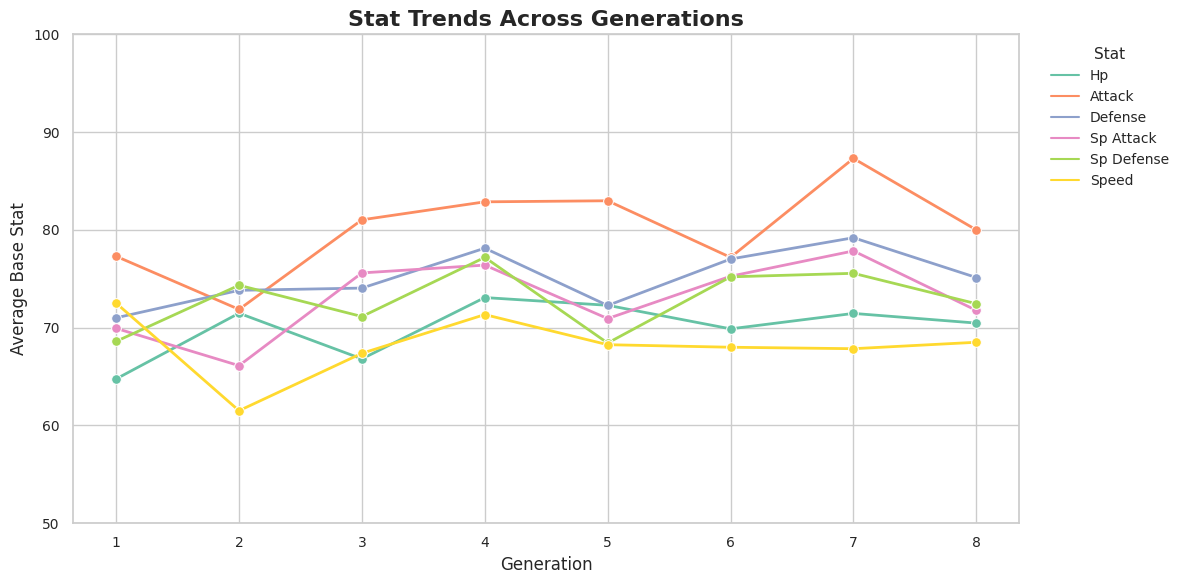

In [11]:

stat_gen_df = pd.read_csv('/kaggle/input/queried-csvs/objective 5.csv')

# Define stat columns
stats_gen = ['avg_hp', 'avg_attack', 'avg_defense', 'avg_sp_attack', 'avg_sp_defense', 'avg_speed']

# Reshape
long_df = stat_gen_df.melt(
    id_vars='generation',
    value_vars=stats_gen,
    var_name='stat',
    value_name='average'
)

# Clean up stat names
long_df['stat'] = long_df['stat'].str.replace('avg_', '', regex=False).str.replace('_', ' ').str.title()

# Set style and palette
sns.set(style='whitegrid')
palette = sns.color_palette("Set2")[:6]

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=long_df,
    x='generation',
    y='average',
    hue='stat',
    marker='o',
    palette=palette,
    linewidth=2,
    markersize=7
)

# Titles and labels
plt.title('Stat Trends Across Generations', fontsize=16, fontweight='bold', fontname='DejaVu Sans')
plt.xlabel('Generation', fontsize=12, fontname='DejaVu Sans')
plt.ylabel('Average Base Stat', fontsize=12, fontname='DejaVu Sans')
plt.xticks(sorted(stat_gen_df['generation'].unique()), fontsize=10, fontname='DejaVu Sans')
plt.yticks(ticks=range(50, 101, 10), fontsize=10, fontname='DejaVu Sans')

# Legend styling
plt.legend(title='Stat', bbox_to_anchor=(1.02, 1), loc='upper left',
           frameon=False, fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.savefig('stat_trends_across_generations.png', dpi=300, bbox_inches='tight')
plt.show()

For this visualization, I had an issue with handling null values. After I pivoted the data into it's wide form it had missing values, which returned and error. heatmap_data.fillna and turning this data into an integer fixed the problem with my heatmap.

In [12]:
cor_df = pd.read_csv('/kaggle/input/queried-csvs/objective 6.csv')
#Checking for correlation based on my hypothesis
corr_matrix = cor_df.corr()
corr_matrix["avg_catch_rate"]

stat_range       -0.624060
num_of_pokemon   -0.030971
avg_catch_rate    1.000000
Name: avg_catch_rate, dtype: float64

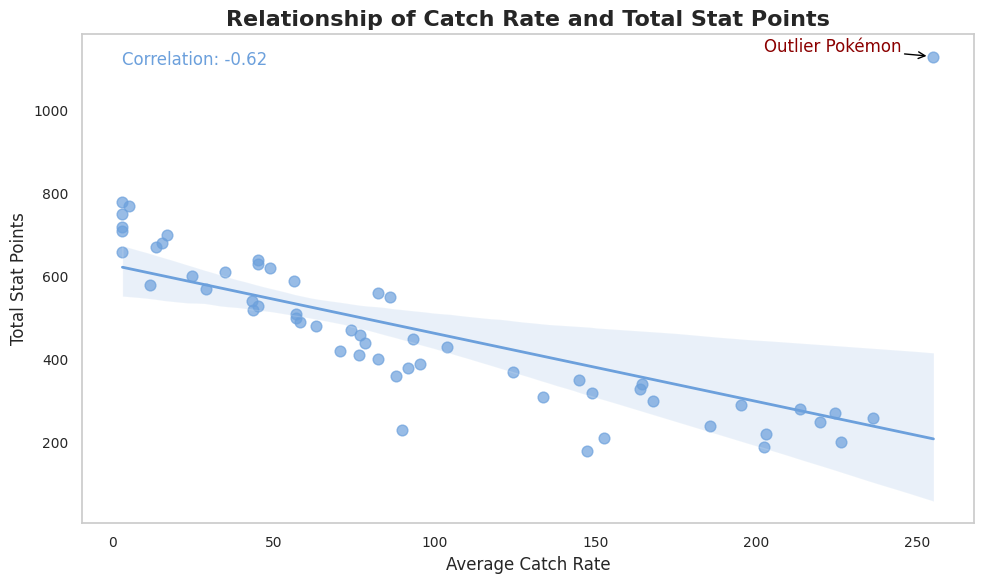

In [13]:
# Prepare data
x = cor_df['avg_catch_rate']
y = cor_df['stat_range']
corr = np.corrcoef(x, y)[0, 1]

# Set visual style
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

# Plot with lighter blue and consistent font
sns.regplot(
    x=x,
    y=y,
    scatter_kws={'s': 60, 'alpha': 0.7, 'color': '#6CA0DC'},  # light blue
    line_kws={"color": '#6CA0DC', "linewidth": 2}
)

# Titles and labels
plt.title('Relationship of Catch Rate and Total Stat Points',
          fontsize=16, fontweight='bold', fontname='DejaVu Sans')
plt.xlabel('Average Catch Rate', fontsize=12, fontname='DejaVu Sans')
plt.ylabel('Total Stat Points', fontsize=12, fontname='DejaVu Sans')
plt.xticks(fontsize=10, fontname='DejaVu Sans')
plt.yticks(fontsize=10, fontname='DejaVu Sans')

# Annotate correlation
plt.text(x.min(), y.max() - 20, f"Correlation: {corr:.2f}",
         fontsize=12, color='#6CA0DC', fontname='DejaVu Sans')

# Highlight the outlier
outlier = cor_df[(cor_df['stat_range'] == 1130) & (cor_df['avg_catch_rate'] == 255)]
if not outlier.empty:
    outlier_x = outlier['avg_catch_rate'].values[0]
    outlier_y = outlier['stat_range'].values[0]
    
plt.annotate(
    'Outlier Pokémon',
    xy=(outlier_x, outlier_y),
    xytext=(outlier_x - 10, outlier_y + 10),  # Move farther to ensure it's visible
    fontsize=12,
    color='darkred',
    fontname='DejaVu Sans',
    arrowprops=dict(
        arrowstyle='->',
        color='black',
        lw=1,
        shrinkA=0, shrinkB=5,  # controls distance from arrow tip to point
        clip_on=False
    ),
    ha='right'
)

# Final touches
plt.grid(False)
plt.tight_layout()
plt.savefig('correlation_catch_and_stats.png', dpi=300, bbox_inches='tight')
plt.show()



# Step 5: 🖼️Dashboarding the data🖼️
After visualizing all of the necessary objectives that can't be accomplished in tableau. It's time to save these as PNG files for dashboarding purposes. After I do some dashboarding in Tableau. I will be utilizing a combination of the visualizations created in Python and visualizations yet to be made in tableau using our exported CSV's.

I created multiple tabs to seperate objectives that are relevant to each other. Also, a landing page was created for an overview of the project.

Here is a link to the finished dashboard: https://public.tableau.com/views/PokemonEDA_17508162389590/PokmonHighlightsStatTrends_1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link


# Step 6: 🤓Insights and recommendations🤓

📊 Insights Summary: Pokémon EDA Dashboard
This section presents key insights generated from the Pokémon dataset, spanning Generations 1 to 8. The analysis focuses on stats, types, growth patterns, and classifications, combining static Python visualizations and interactive Tableau charts.

1. ## 🐉 Top-Performing Pokémon Types (Total & Individual Stats)

* Dragon-types (primary) have the highest average total base stats — ~50 points higher than the next best type.
* By individual stat:
    * Attack: Dragon
    * Special Attack: Psychic
    * Defense: Steel
* Dual-type combinations involving Dragon, Psychic, or Steel consistently appear at the top for average total stats.

2. ## 📈 Pokémon Population Growth Across Generations
   
* Generation 1 introduced the most Pokémon (192 species).
* Generations 2–5 each added over 100 new Pokémon.
* Decline from Generation 6 onward:
    * Gen 6: 85
    * Gen 7: 99
    * Gen 8: 87

3. ##  🔀 Dual-Type Distribution and Frequency

* Dual-types became more common in Generations 6 and 7, while earlier gens had more single-type Pokémon.
* Most frequent combinations:
    * Flying/Normal is the most common
    * Followed by Grass/Poison (14 Pokémon)
    * Then Bug/Flying
    * Bug and Dark types have the most diverse unique pairings, followed by Dragon-types.

4. ## 🏅 Stats by Pokémon Classification

* Legendary Pokémon have the highest average in all six stats.
* Mythical Pokémon have stronger offensive stats than Sub-Legendaries.
* Sub-Legendaries perform better defensively than Mythicals.
* Normal Pokémon have the lowest average stats overall.

5. ##  🔄 Stat Trends Across Generations

* Generation 2 Pokémon show the highest average Attack stats, reflecting a focus on offensive power.
* Speed is the lowest on average across all generations, indicating a shift away from speed-focused design.

6. ## 🎯 Catch Rate vs. Strength

* A moderate to strong negative correlation of -0.62 exists between total base stats and catch rate.
    → Stronger Pokémon are generally harder to catch.

* Outlier: Eternamax Eternatus, despite being the strongest Pokémon (base stat: 1125), has the highest catch rate because it must be caught to progress in Pokémon Sword and Shield.

7. ## ⚔️ Type-Based Stat Overview (Primary vs. Secondary Types)

* Dual-type Pokémon have higher average total stats than single-type Pokémon across all generations.
* This suggests that type synergy contributes to stronger stat distributions.

8. ##  📚 Growth Rate Distribution by Type

* Medium Fast is the most common growth rate, especially among:
    * Normal (55), Water (45), Bug (32), Electric (34)
* Medium Slow is next most frequent, common in:
    * Grass (51), Fire (34), Water (37)

* Type-specific trends:
    * Normal-types are almost exclusively Medium Fast.
    * Water-types are the most evenly spread across all growth rates.
    * Dragon-types are mostly Slow, consistent with high power but slow development.
    * Electric-, Fairy-, and Ghost-types mostly follow Medium Fast patterns.
    * Fighting- and Fire-types lean toward Medium Slow.
    * Rock- and Steel-types are the least distributed across growth categories.

9. ## 🥇 Top 10 Strongest Pokémon by Total Stats
    
    1.) Eternamax Eternatus – 1125

    2 - 4.)Mega Mewtwo Y, Mega Mewtwo X, Mega Rayquaza – 780

    5 - 6.)Primal Kyogre, Primal Groudon – 770

    7.) Ultra Necrozma – 754

    8 - 10.)Zacian (Crowned Sword), Zamazenta (Crowned Shield), Arceus – 720

        These Pokémon represent the peak of strength in the franchise and are often tied to legendary or key story roles.

10. ## 🏃‍♂️ Top Pokémon by Individual Stats

* The Pokémon with the highest individual base stats in each category are some of the most iconic in the franchise. Blissey and Eternamax Eternatus share the highest HP stat at 255. Mega Mewtwo X holds the highest Attack stat with 190, while Mega Mewtwo Y leads in Special Attack with 194. Eternamax Eternatus also dominates in both Defense and Special Defense, each at 250. For Speed, Deoxys (Speed Forme) is the fastest Pokémon with a stat of 180. These standout stats reflect the exceptional design and battle capabilities of these legendary and mythical Pokémon.

# Recommendations & Future Analysis

## 🔧 Actionable Recommendations
Game Strategy: Players aiming for competitive advantage should prioritize Pokémon with Dragon, Psychic, or Steel typings, as they consistently show high average stats across multiple categories.

Team Building: Including dual-type Pokémon in teams can offer stat advantages, as they generally outperform single-type Pokémon in total base stats.

Battle Preparation: When encountering Pokémon with high total stats (especially Legendaries or Mythicals), expect lower catch rates—prepare with status effects and high-performance Poké Balls.

Growth Optimization: Pokémon with Medium Fast growth rates (especially Electric and Normal types) level up efficiently, making them suitable for faster team progression.

## 🔍 Future Analysis Opportunities
Abilities and Natures: Explore how Pokémon abilities and natures interact with base stats and influence battle performance.

Moveset Diversity: Analyze move pools by type and stat synergy to assess battle versatility.

EV/IV Distributions: Incorporate Effort Values (EVs) and Individual Values (IVs) to evaluate competitive viability more precisely.

Evolution Impact: Measure how base stats change from pre-evolution to final forms, especially among dual-type Pokémon.

Legendary vs. Non-Legendary: Conduct deeper comparative analysis of usage, stat distributions, and game presence between legendary, mythical, and standard Pokémon.

Time Series: Investigate how stat trends, typings, and growth rates evolve across future generations (Gen 9+).